In [1]:
#Accuracy = 0.8847
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

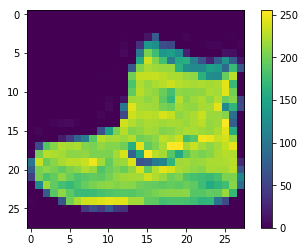

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

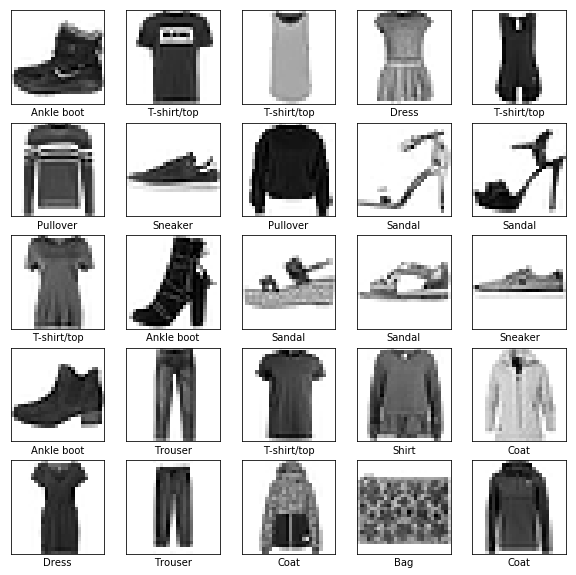

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0712 11:47:42.120560  1664 deprecation.py:506] From C:\Users\hp\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4948 - acc: 0.8263
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3730 - acc: 0.8649
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3329 - acc: 0.8792
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3091 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2926 - acc: 0.8922
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2788 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2654 - acc: 0.9024
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2554 - acc: 0.9046
Epoch 9/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2466 - acc: 0.9089
Epoch 10/10
60000/60000 [==============================] - 3s 50us/sample - loss: 

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3435 - acc: 0.8782
Test accuracy: 0.8782


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([2.0737130e-07, 3.8821593e-10, 5.3483901e-10, 8.4057766e-10,
       4.9472191e-09, 6.5538012e-03, 3.3294705e-07, 2.2784777e-03,
       9.2342560e-08, 9.9116713e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

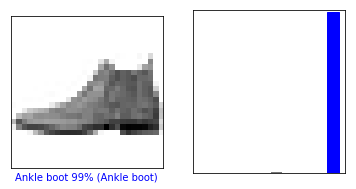

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

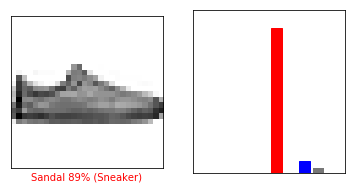

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

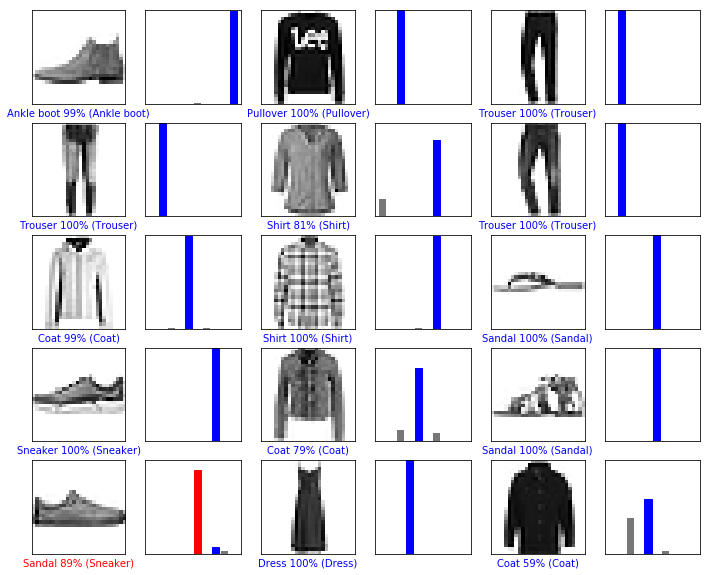

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
img = test_images[0]
print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.0737110e-07 3.8821593e-10 5.3483901e-10 8.4057927e-10 4.9472093e-09
  6.5538078e-03 3.3294705e-07 2.2784756e-03 9.2342738e-08 9.9116713e-01]]


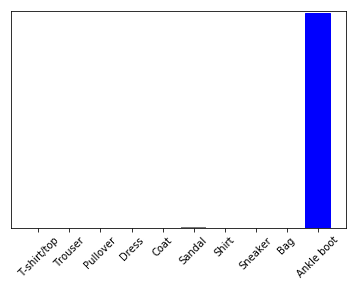

In [27]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [28]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
